### Student Name: Christian Clarke

In [16]:
#TODO: import the modules
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd

### Step 1 – Explain any overfitting or underfitting in the previous model

There seemed to be a bit of underfitting in the previous model. While the tree seemed to have a deal of depth it mainly focused on a singular attribute of the data. While that singular attribute does contribute quite a bit there are subtle nuances in the other attributes, that can actually lead to dramatic differences in the resulting tip. Lacking these other attributes would definitely cause a problem in the accuracy.

### Step 2 – Load the data and extract the features

In [6]:
#TODO: load the data and extract the features: 'VendorID', RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_type', 'congestion_surcharge', 'tip'
features = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID',
            'passenger_count', 'trip_distance', 'fare_amount', 'extra',
            'mta_tax', 'tolls_amount', 'improvement_surcharge', 'total_amount',
            'trip_type', 'congestion_surcharge', 'tip']

file_path = 'https://raw.githubusercontent.com/davashu/module-05-decision-trees-part-2-clarkech95/master/trip_data.csv?token=APVD6MISDNQMUS2OU6L64DC65LCFA'
df = pd.read_csv(file_path, usecols = features)
X = df.iloc[: , 0:14]
y = df.iloc[: , 14]

### Step 3 – Split the data
The test set should comprise 30% of the dataset. Ensure the data is randomized and that stratified samples are obtained.

In [7]:
#TODO: Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 48,
                                                   stratify = y) #TODO: fill in the required options

### Step 4 – Instantiate the Decision Tree Classifer

In [8]:
dt_estimator = DecisionTreeClassifier()

### Step 5 – Create a dictionary that contains the decision tree parameters

In [9]:
params = {
    'criterion': ['gini', 'entropy'], #a list of options for criterion.
    'max_depth': [7, 9, 14], #TODO: provide a list of three numbers between 5 and 15 inclusive.
    'min_samples_split':[114, 117, 144, 194, 213, 226, 333, 372, 427, 480] #TODO: provide a list of ten numbers between 100 and 500.
}

### Step 6 – Perform the Random search
Provide the dictionary from step 5 above and use the decison tree from step 4 as the estimator.

In [10]:
rand_search = RandomizedSearchCV(estimator=dt_estimator, 
                                 param_distributions=params, 
                                 random_state=7, 
                                 scoring='accuracy', 
                                 verbose=3, #display messages while training
                                 n_iter= 74,#TODO: set n_iter to a value between 50 and 100
                                 cv= 10) #TODO: set the number of folds to 10 for the cross validation


estimator = rand_search.fit(X_train, y_train)


print('Best parameters:', estimator.best_params_)
print('Best score:', estimator.best_score_) #note: if the score is low, increase n_iter or adjust the values in step 5.

C:\Users\clark\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 60 is smaller than n_iter=74. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] min_samples_split=114, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=0.727, total=   1.0s
[CV] min_samples_split=114, max_depth=7, criterion=gini ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=0.732, total=   0.9s
[CV] min_samples_split=114, max_depth=7, criterion=gini ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=0.733, total=   0.9s
[CV] min_samples_split=114, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=0.731, total=   0.9s
[CV] min_samples_split=114, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=0.729, total=   0.9s
[CV] min_samples_split=114, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=0.733, total=   0.9s
[CV] min_samples_split=114, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=0.734, total=   0.9s
[CV] min_samples_split=114, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=0.733, total=   0.9s
[CV] min_samples_split=114, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=114, max_depth=7, criterion=gini, score=

[CV]  min_samples_split=226, max_depth=7, criterion=gini, score=0.731, total=   0.9s
[CV] min_samples_split=226, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=226, max_depth=7, criterion=gini, score=0.732, total=   0.9s
[CV] min_samples_split=226, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=226, max_depth=7, criterion=gini, score=0.731, total=   0.9s
[CV] min_samples_split=226, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=226, max_depth=7, criterion=gini, score=0.732, total=   0.9s
[CV] min_samples_split=226, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=226, max_depth=7, criterion=gini, score=0.728, total=   0.9s
[CV] min_samples_split=333, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=333, max_depth=7, criterion=gini, score=0.723, total=   0.9s
[CV] min_samples_split=333, max_depth=7, criterion=gini ..............
[CV]  min_samples_split=333, max_depth=7, criterion=gini, score=

[CV]  min_samples_split=114, max_depth=9, criterion=gini, score=0.801, total=   1.0s
[CV] min_samples_split=114, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=114, max_depth=9, criterion=gini, score=0.802, total=   1.0s
[CV] min_samples_split=117, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=117, max_depth=9, criterion=gini, score=0.798, total=   1.0s
[CV] min_samples_split=117, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=117, max_depth=9, criterion=gini, score=0.799, total=   1.0s
[CV] min_samples_split=117, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=117, max_depth=9, criterion=gini, score=0.798, total=   1.0s
[CV] min_samples_split=117, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=117, max_depth=9, criterion=gini, score=0.806, total=   1.0s
[CV] min_samples_split=117, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=117, max_depth=9, criterion=gini, score=

[CV]  min_samples_split=333, max_depth=9, criterion=gini, score=0.787, total=   1.0s
[CV] min_samples_split=333, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=333, max_depth=9, criterion=gini, score=0.784, total=   1.0s
[CV] min_samples_split=333, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=333, max_depth=9, criterion=gini, score=0.792, total=   1.0s
[CV] min_samples_split=333, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=333, max_depth=9, criterion=gini, score=0.791, total=   1.0s
[CV] min_samples_split=333, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=333, max_depth=9, criterion=gini, score=0.794, total=   1.0s
[CV] min_samples_split=333, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=333, max_depth=9, criterion=gini, score=0.790, total=   1.0s
[CV] min_samples_split=333, max_depth=9, criterion=gini ..............
[CV]  min_samples_split=333, max_depth=9, criterion=gini, score=

[CV]  min_samples_split=117, max_depth=14, criterion=gini, score=0.896, total=   1.3s
[CV] min_samples_split=117, max_depth=14, criterion=gini .............
[CV]  min_samples_split=117, max_depth=14, criterion=gini, score=0.903, total=   1.3s
[CV] min_samples_split=117, max_depth=14, criterion=gini .............
[CV]  min_samples_split=117, max_depth=14, criterion=gini, score=0.902, total=   1.2s
[CV] min_samples_split=117, max_depth=14, criterion=gini .............
[CV]  min_samples_split=117, max_depth=14, criterion=gini, score=0.901, total=   1.2s
[CV] min_samples_split=117, max_depth=14, criterion=gini .............
[CV]  min_samples_split=117, max_depth=14, criterion=gini, score=0.898, total=   1.2s
[CV] min_samples_split=117, max_depth=14, criterion=gini .............
[CV]  min_samples_split=117, max_depth=14, criterion=gini, score=0.900, total=   1.2s
[CV] min_samples_split=144, max_depth=14, criterion=gini .............
[CV]  min_samples_split=144, max_depth=14, criterion=gini,

[CV]  min_samples_split=333, max_depth=14, criterion=gini, score=0.864, total=   1.2s
[CV] min_samples_split=333, max_depth=14, criterion=gini .............
[CV]  min_samples_split=333, max_depth=14, criterion=gini, score=0.860, total=   1.2s
[CV] min_samples_split=333, max_depth=14, criterion=gini .............
[CV]  min_samples_split=333, max_depth=14, criterion=gini, score=0.861, total=   1.2s
[CV] min_samples_split=372, max_depth=14, criterion=gini .............
[CV]  min_samples_split=372, max_depth=14, criterion=gini, score=0.860, total=   1.2s
[CV] min_samples_split=372, max_depth=14, criterion=gini .............
[CV]  min_samples_split=372, max_depth=14, criterion=gini, score=0.859, total=   1.2s
[CV] min_samples_split=372, max_depth=14, criterion=gini .............
[CV]  min_samples_split=372, max_depth=14, criterion=gini, score=0.857, total=   1.2s
[CV] min_samples_split=372, max_depth=14, criterion=gini .............
[CV]  min_samples_split=372, max_depth=14, criterion=gini,

[CV]  min_samples_split=117, max_depth=7, criterion=entropy, score=0.714, total=   0.9s
[CV] min_samples_split=144, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=7, criterion=entropy, score=0.707, total=   0.9s
[CV] min_samples_split=144, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=7, criterion=entropy, score=0.714, total=   0.9s
[CV] min_samples_split=144, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=7, criterion=entropy, score=0.713, total=   1.0s
[CV] min_samples_split=144, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=7, criterion=entropy, score=0.720, total=   0.9s
[CV] min_samples_split=144, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=7, criterion=entropy, score=0.713, total=   0.9s
[CV] min_samples_split=144, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=7, crit

[CV]  min_samples_split=372, max_depth=7, criterion=entropy, score=0.709, total=   0.9s
[CV] min_samples_split=372, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=7, criterion=entropy, score=0.709, total=   0.9s
[CV] min_samples_split=372, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=7, criterion=entropy, score=0.715, total=   0.9s
[CV] min_samples_split=372, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=7, criterion=entropy, score=0.708, total=   0.9s
[CV] min_samples_split=372, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=7, criterion=entropy, score=0.713, total=   0.9s
[CV] min_samples_split=372, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=7, criterion=entropy, score=0.716, total=   1.0s
[CV] min_samples_split=372, max_depth=7, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=7, crit

[CV]  min_samples_split=144, max_depth=9, criterion=entropy, score=0.796, total=   1.0s
[CV] min_samples_split=144, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=9, criterion=entropy, score=0.792, total=   1.0s
[CV] min_samples_split=144, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=9, criterion=entropy, score=0.798, total=   1.1s
[CV] min_samples_split=144, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=9, criterion=entropy, score=0.799, total=   1.1s
[CV] min_samples_split=144, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=9, criterion=entropy, score=0.795, total=   1.1s
[CV] min_samples_split=144, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=9, criterion=entropy, score=0.788, total=   1.1s
[CV] min_samples_split=144, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=144, max_depth=9, crit

[CV]  min_samples_split=372, max_depth=9, criterion=entropy, score=0.782, total=   1.0s
[CV] min_samples_split=372, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=9, criterion=entropy, score=0.782, total=   1.0s
[CV] min_samples_split=372, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=9, criterion=entropy, score=0.778, total=   1.0s
[CV] min_samples_split=372, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=9, criterion=entropy, score=0.774, total=   1.0s
[CV] min_samples_split=372, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=372, max_depth=9, criterion=entropy, score=0.780, total=   1.0s
[CV] min_samples_split=427, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=427, max_depth=9, criterion=entropy, score=0.773, total=   1.0s
[CV] min_samples_split=427, max_depth=9, criterion=entropy ...........
[CV]  min_samples_split=427, max_depth=9, crit

[CV]  min_samples_split=144, max_depth=14, criterion=entropy, score=0.906, total=   1.3s
[CV] min_samples_split=144, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=144, max_depth=14, criterion=entropy, score=0.899, total=   1.3s
[CV] min_samples_split=144, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=144, max_depth=14, criterion=entropy, score=0.897, total=   1.3s
[CV] min_samples_split=194, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=194, max_depth=14, criterion=entropy, score=0.880, total=   1.3s
[CV] min_samples_split=194, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=194, max_depth=14, criterion=entropy, score=0.894, total=   1.2s
[CV] min_samples_split=194, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=194, max_depth=14, criterion=entropy, score=0.884, total=   1.3s
[CV] min_samples_split=194, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=194, max_depth=1

[CV]  min_samples_split=372, max_depth=14, criterion=entropy, score=0.858, total=   1.3s
[CV] min_samples_split=427, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=427, max_depth=14, criterion=entropy, score=0.849, total=   1.4s
[CV] min_samples_split=427, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=427, max_depth=14, criterion=entropy, score=0.857, total=   1.3s
[CV] min_samples_split=427, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=427, max_depth=14, criterion=entropy, score=0.853, total=   1.2s
[CV] min_samples_split=427, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=427, max_depth=14, criterion=entropy, score=0.859, total=   1.3s
[CV] min_samples_split=427, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=427, max_depth=14, criterion=entropy, score=0.854, total=   1.3s
[CV] min_samples_split=427, max_depth=14, criterion=entropy ..........
[CV]  min_samples_split=427, max_depth=1

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 10.7min finished


Best parameters: {'min_samples_split': 114, 'max_depth': 14, 'criterion': 'entropy'}
Best score: 0.9066617617028431


### Step 7 – Train the decision tree

In [11]:
#Instantiate the Decision Tree Classifer object 
dt_classifier = DecisionTreeClassifier(criterion= 'entropy', #TODO: use the value from the random search results.
                                       max_depth= 14, #TODO: use the value from the random search results.
                                       min_samples_split = 114 #TODO: use the value from the random search results.
                                      )

#Train Decision Tree Classifer using the `fit` method
dt_classifier.fit(X_train, y_train)

#Make predictions with `X_test` and store the result in a variable called `y_pred
y_pred = dt_classifier.predict(X_test)

### Step 8 – Evaluate the accuracy

In [13]:
#TODO: calculate and display the accuracy score using `y_test` and `y_pred`
metrics.accuracy_score(y_test, y_pred)

0.90962138689103

### Step 9 – Visualize the decision tree

[Text(333.6375, 605.7257142857143, 'total_amount <= 7.275\nentropy = 1.848\nsamples = 120358\nvalue = [19748, 27982, 18306, 54322]'),
 Text(184.45000000000002, 512.537142857143, 'total_amount <= 6.835\nentropy = 1.759\nsamples = 10118\nvalue = [4736, 1807, 2769, 806]'),
 Text(99.2, 419.34857142857146, 'fare_amount <= 4.75\nentropy = 1.877\nsamples = 7230\nvalue = [2144, 1525, 2756, 805]'),
 Text(49.6, 326.16, 'total_amount <= 5.945\nentropy = 1.855\nsamples = 5091\nvalue = [2142, 1312, 1073, 564]'),
 Text(24.8, 232.9714285714286, 'fare_amount <= 4.25\nentropy = 1.583\nsamples = 2438\nvalue = [175, 1108, 988, 167]'),
 Text(12.4, 139.7828571428571, 'total_amount <= 4.805\nentropy = 1.616\nsamples = 1952\nvalue = [175, 1044, 566, 167]'),
 Text(6.2, 46.594285714285775, '\n  (...)  \n'),
 Text(18.6, 46.594285714285775, '\n  (...)  \n'),
 Text(37.2, 139.7828571428571, 'total_amount <= 5.805\nentropy = 0.562\nsamples = 486\nvalue = [0, 64, 422, 0]'),
 Text(31.0, 46.594285714285775, '\n  (...)

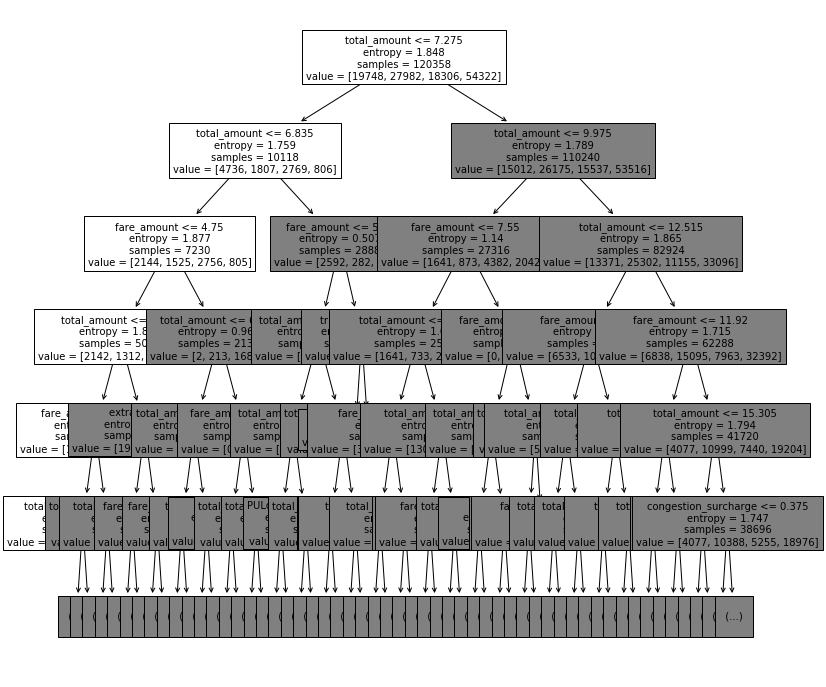

In [17]:
#TODO: Display the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
viz = tree.plot_tree(dt_classifier, feature_names = features, max_depth = 5, fontsize = 10)
viz

### Step 10 – Summarize the results using one paragraph (2-5 sentences)

This upgraded version of the tree performed significantly better than the previous one. It is definitely deeper than the previous one but thankfully not deeper in a way that causes overfitting. One noticeable difference is the inclusion of more attributes in the decision making process. This allows for the capturing of more of the nuances within the data. Amazing to see such a significant leap in performance.